# Histograms and Density Plots

Adapted from <a href = "https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0">Will Koehrsen</a>
* Github:  https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb

In this notebook we will look at the [NYCFlights13 dataset](https://www.kaggle.com/datasets/aephidayatuloh/nyc-flights-2013), which contains information on over 300,000 planes departing NYC airports in 2013. We will focus on visualizing the distribution of arrival delays given in minutes. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import 

To begin, we will join two of the data files into one:

In [2]:
flights = pd.read_csv('airline_data/nyc_flights.csv')
airlines = pd.read_csv('airline_data/nyc_airlines.csv')

flights = flights.merge(airlines, how = 'left', on = 'carrier')
flights = flights[['arr_delay', 'name']] 

# Filter flight delays between -60 and 120 minutes
flights = flights[flights['arr_delay'].between(-60, 120)]
flights.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'airline_data/nyc_flights.csv'

Or you may just read in the formatted version provided on Canvas:

In [2]:
flights = pd.read_csv('formatted_flights.csv', index_col = 0)
flights.head()

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.


In [3]:
flights['arr_delay'].describe()

count    317113.000000
mean          1.297143
std          29.064401
min         -60.000000
25%         -17.000000
50%          -6.000000
75%          11.000000
max         120.000000
Name: arr_delay, dtype: float64

# Histogram of All Arrival Delays 

## Matplotlib

In [ ]:
# Make the histogram using matplotlib, bins must be integet
plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = 180 // 5)

# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)'); plt.ylabel('Flights');

## Seaborn

In [ ]:
sns.histplot(flights['arr_delay'], bins= 180 // 5, color = 'blue')

plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)'); plt.ylabel('Flights');


## Histogram with Varying Binwidths

In [ ]:
# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(18, 16))
coords = [(0, 0), (0, 1), (1, 0), (1, 1)]

# Show 4 different binwidths
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    ax = axs[coords[i][0]][coords[i][1]]
    
    # Draw the plot
    ax.hist(flights['arr_delay'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 30)
    ax.set_xlabel('Delay (min)', size = 22)
    ax.set_ylabel('Flights', size= 22)

plt.tight_layout()
plt.show()

# Where Histograms Fail: Multiple Categories

Histograms work very well for display a single variable from one category (in this case the one category was all the flights). However, for displaying multiple categories, a histogram does not work well because the plots are obscured.

In [ ]:
# Extract top five airlines with most flights
carrier_flights = pd.Series(flights.groupby('name')['name'].count())
carrier_flights = carrier_flights.sort_values(ascending=False)
top_five = carrier_flights.index[:5]

# Subset to the top 5 airlines
top_five_flights = flights[flights['name'].isin(top_five)]

In [ ]:
plt.figure(figsize = (10, 8)) 

# Iterate through each of the five airlines
for airline in top_five:
    # Subset to the airline
    subset = top_five_flights[top_five_flights['name'] == airline]
    # Make a histogram with the airline
    sns.histplot(subset['arr_delay'], bins = int(180/5), label = airline, stat = "density")
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Histogram of Delays by Airline'); plt.xlabel('Delay (min)'); plt.ylabel('Normalized Counts');

In [ ]:
# Make a separate list for each airline
x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

## Solution 1: Side-by-Side Histograms

In [ ]:
plt.figure(figsize = (10, 8))

# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), density=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines');

## Solution 2: Stacked Histograms

In [ ]:
plt.figure(figsize = (10, 8))
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), density=True,
         stacked=True,
         color = colors, label=names)

plt.legend(); plt.xlabel('Delay (min)'); plt.ylabel('Normed Flights');
plt.title('Stacked Histogram with Multiple Airlines');

# Solution 3: Density Plots

A density plot uses a kernel (by default a Gaussian) at every data point to create a distribution and then sums the distribution at each location to create a single distribution.

![](images/KDEWIKI.png)

This produces a smoothed version of a histogram where the y-axis is in density. This density can be thought of as a probability of the data value corresponding to the value on the x-axis, but this can create issues because the density may be greater than one. I usually just think of it as _density_, a value used for comparison purposes only. 

## Density Plot of All Delays Using Seaborn

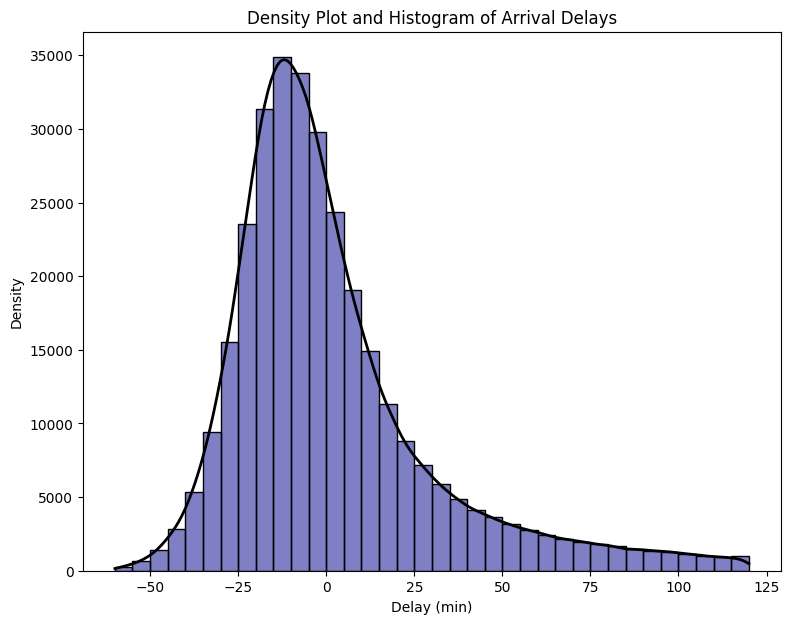

In [4]:
fig, ax = plt.subplots(figsize = (9, 7))

sns.histplot(flights['arr_delay'], ax = ax, kde=True, 
             bins=int(180/5), color = 'darkblue')

# Adjust density curve appearance
ax.lines[0].set_color("black")
ax.lines[0].set_linewidth(2)

plt.title('Density Plot and Histogram of Arrival Delays'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

# Density Plot with Varying Bandwidths

See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html#scipy.stats.gaussian_kde 

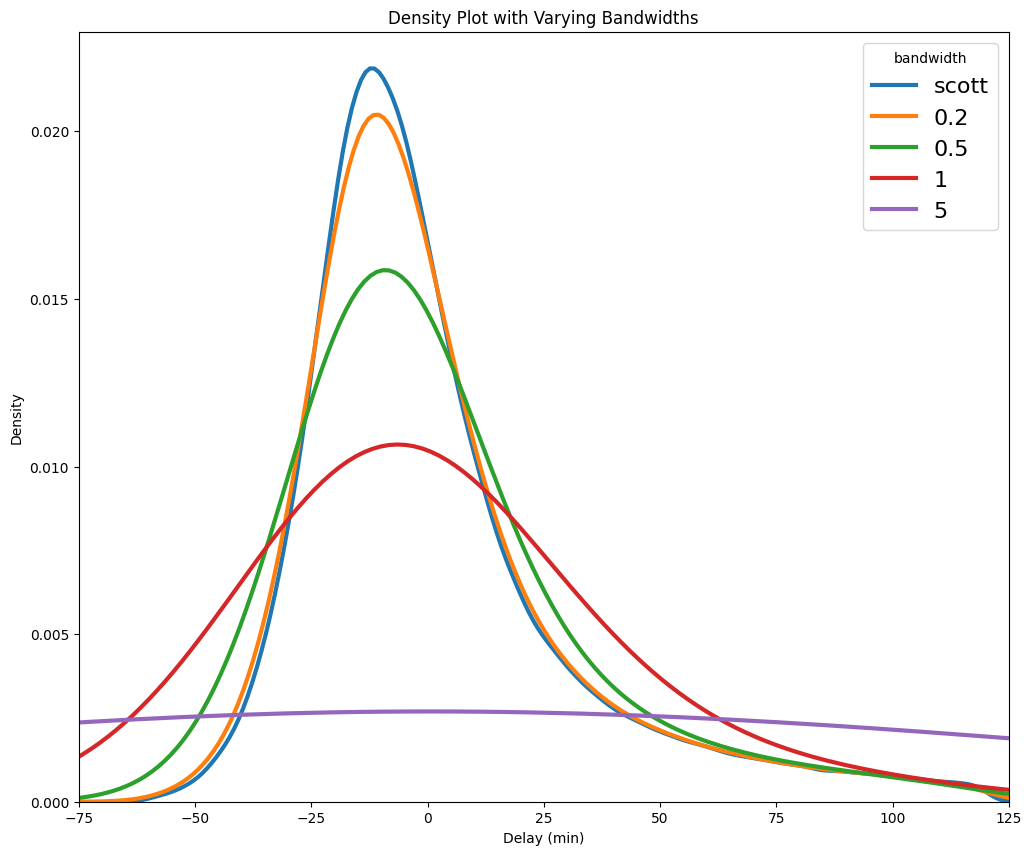

In [4]:
plt.figure(figsize = (12, 10))

# Scott method is the default
for bandwidth in ["scott", 0.2, 0.5, 1, 5]:
    sns.kdeplot(flights['arr_delay'], bw_method = bandwidth, linewidth = 3, label = bandwidth)
    
plt.xlim(-75, 125)
    
plt.legend(prop={'size': 16}, title = 'bandwidth')
plt.title('Density Plot with Varying Bandwidths'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

# Density Plot of Delays of Top Five

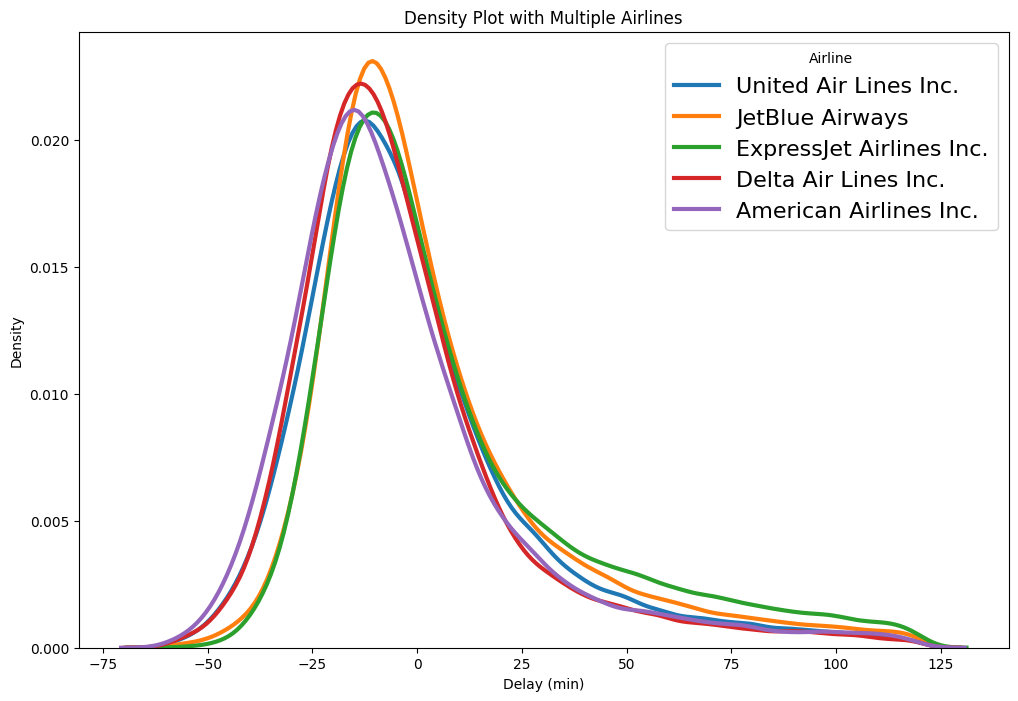

In [9]:
plt.figure(figsize = (12, 8) )

# List of five airlines to plot
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Iterate through the top five airlines
for airline in airlines:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.kdeplot(subset['arr_delay'], linewidth = 3,
                 label = airline)
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines'); 
plt.xlabel('Delay (min)')
plt.ylabel('Density');

## Shaded Density Plot

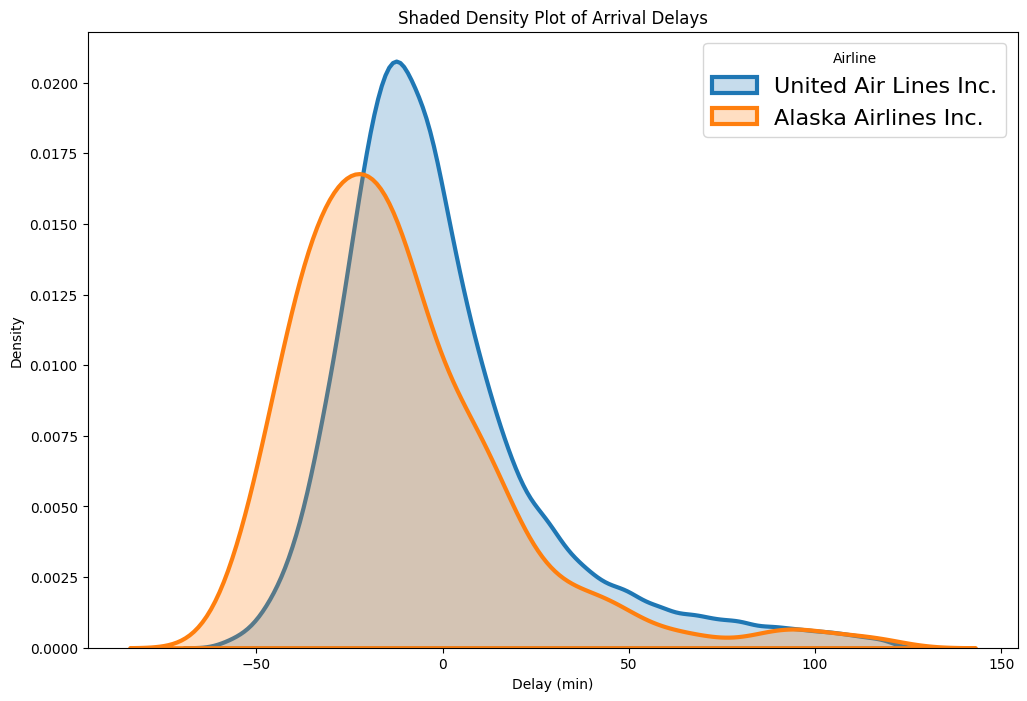

In [8]:
plt.figure(figsize = (12, 8) )


for airline in ['United Air Lines Inc.', 'Alaska Airlines Inc.']:
    subset = flights[flights['name'] == airline]
    
    sns.kdeplot(subset['arr_delay'], fill = True, linewidth = 3, label = airline)
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Shaded Density Plot of Arrival Delays'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

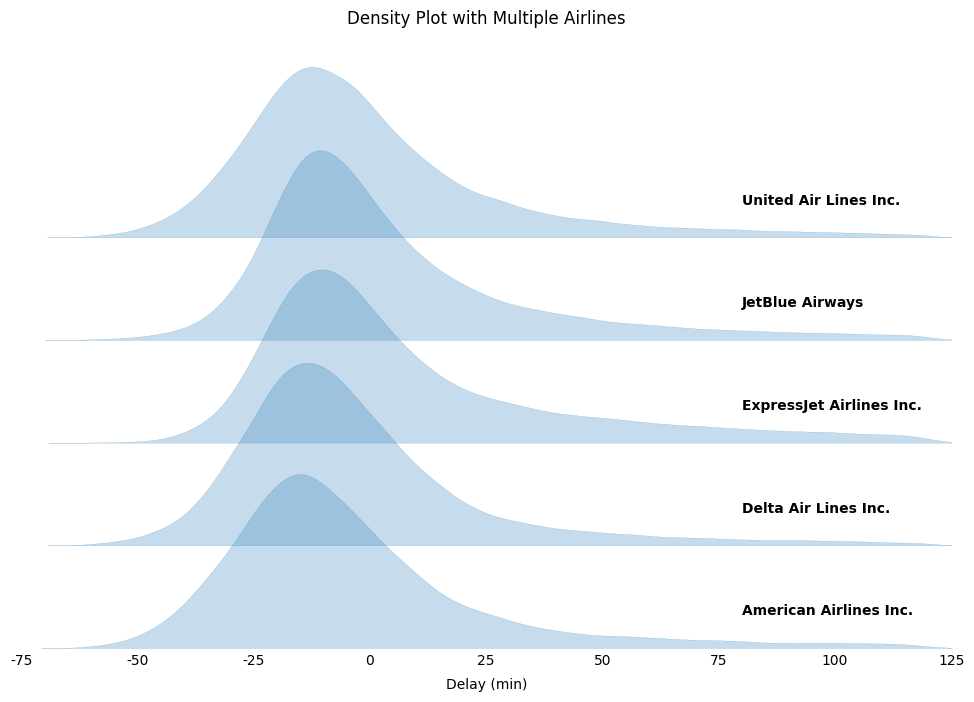

In [7]:
# List of five airlines to plot
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

fig, axs = plt.subplots(5, 1, figsize=(12, 8))

# Iterate through the top five airlines
for i in range(5):
    
    airline = airlines[i]
    
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.kdeplot(subset['arr_delay'], linewidth = 0.1, fill = True,
                 label = airline, ax = axs[i])
    
    axs[i].text(80, 0.004, airline, fontweight="bold")
    axs[i].set_ylim(0, 0.025)
    axs[i].set_xlim(-75, 125)
    axs[i].set_axis_off()

# Condense plots
fig.subplots_adjust(hspace=-0.5)

# Add in units at bottom
xvals = list(range(-75, 126, 25))
for x in xvals:
    axs[4].text(x, -0.002, str(x), ha = "center")
axs[4].text(25, -0.005, "Delay (min)", ha = "center")

# Figure title
axs[0].set_title('Density Plot with Multiple Airlines'); 


## Density with Rug Plot

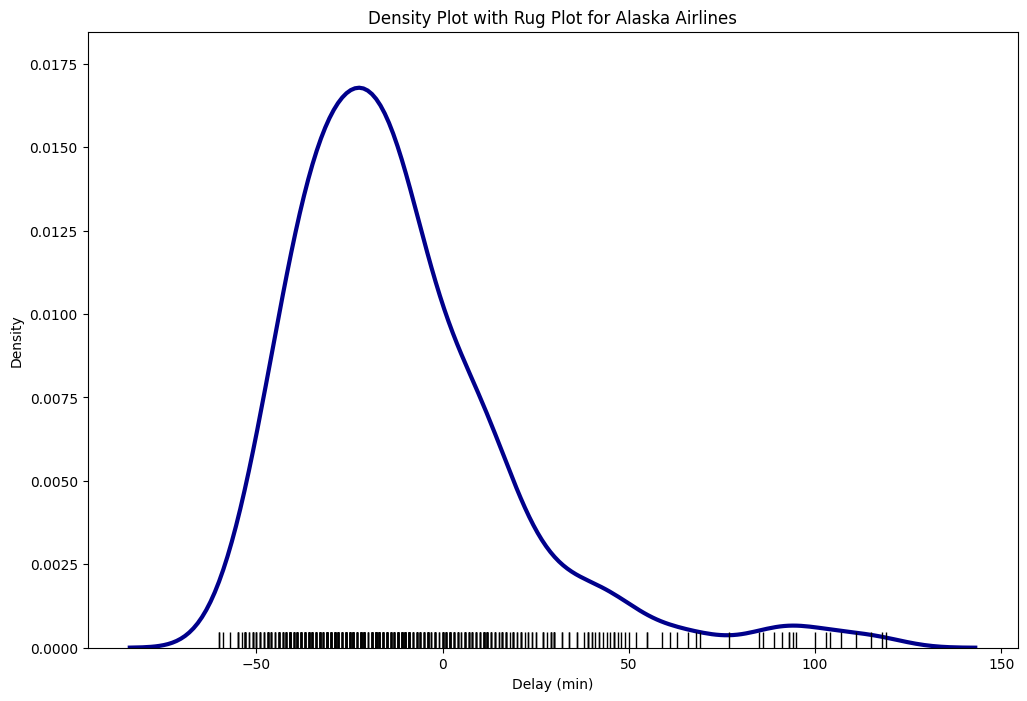

In [6]:
plt.figure(figsize = (12, 8) )

# Subset to Alaska Airlines
subset = flights[flights['name'] == 'Alaska Airlines Inc.']

# Density Plot
sns.kdeplot(subset['arr_delay'], color = 'darkblue', linewidth = 3)

# Rug plot
sns.rugplot(subset['arr_delay'], color = "black")

# Plot formatting
plt.title('Density Plot with Rug Plot for Alaska Airlines');
plt.xlabel('Delay (min)'); plt.ylabel('Density');